## Get Data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import scipy
from scipy import stats

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time



from ucimlrepo import fetch_ucirepo 
  

In [7]:
from ucimlrepo import fetch_ucirepo

# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features 
y = abalone.data.targets 
  
# variable information 
print(abalone.variables) 


             name     role         type demographic  \
0             Sex  Feature  Categorical        None   
1          Length  Feature   Continuous        None   
2        Diameter  Feature   Continuous        None   
3          Height  Feature   Continuous        None   
4    Whole_weight  Feature   Continuous        None   
5  Shucked_weight  Feature   Continuous        None   
6  Viscera_weight  Feature   Continuous        None   
7    Shell_weight  Feature   Continuous        None   
8           Rings   Target      Integer        None   

                   description  units missing_values  
0         M, F, and I (infant)   None             no  
1    Longest shell measurement     mm             no  
2      perpendicular to length     mm             no  
3           with meat in shell     mm             no  
4                whole abalone  grams             no  
5               weight of meat  grams             no  
6  gut weight (after bleeding)  grams             no  
7        

In [8]:
# Access the dataset's metadata
print(abalone.metadata.uci_id)
print(abalone.metadata.num_instances)
print(abalone.metadata.additional_info.summary)

# Access features and targets
data_df = pd.concat([X, y], axis=1)
data_df

1
4177
Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task.  Other measurements, which are easier to obtain, are used to predict the age.  Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [9]:
data0 = data_df.drop(columns=['Sex','Rings'])
data_df = pd.concat([data_df['Sex'],data0 * 200,data_df['Rings']],axis=1)
data_df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,91.0,73.0,19.0,102.8,44.9,20.2,30.0,15
1,M,70.0,53.0,18.0,45.1,19.9,9.7,14.0,7
2,F,106.0,84.0,27.0,135.4,51.3,28.3,42.0,9
3,M,88.0,73.0,25.0,103.2,43.1,22.8,31.0,10
4,I,66.0,51.0,16.0,41.0,17.9,7.9,11.0,7
...,...,...,...,...,...,...,...,...,...
4172,F,113.0,90.0,33.0,177.4,74.0,47.8,49.8,11
4173,M,118.0,88.0,27.0,193.2,87.8,42.9,52.1,10
4174,M,120.0,95.0,41.0,235.2,105.1,57.5,61.6,9
4175,F,125.0,97.0,30.0,218.9,106.2,52.2,59.2,10


D:\AllSoftwares\Anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\AllSoftwares\Anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\AllSoftwares\Anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\AllSoftwares\Anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

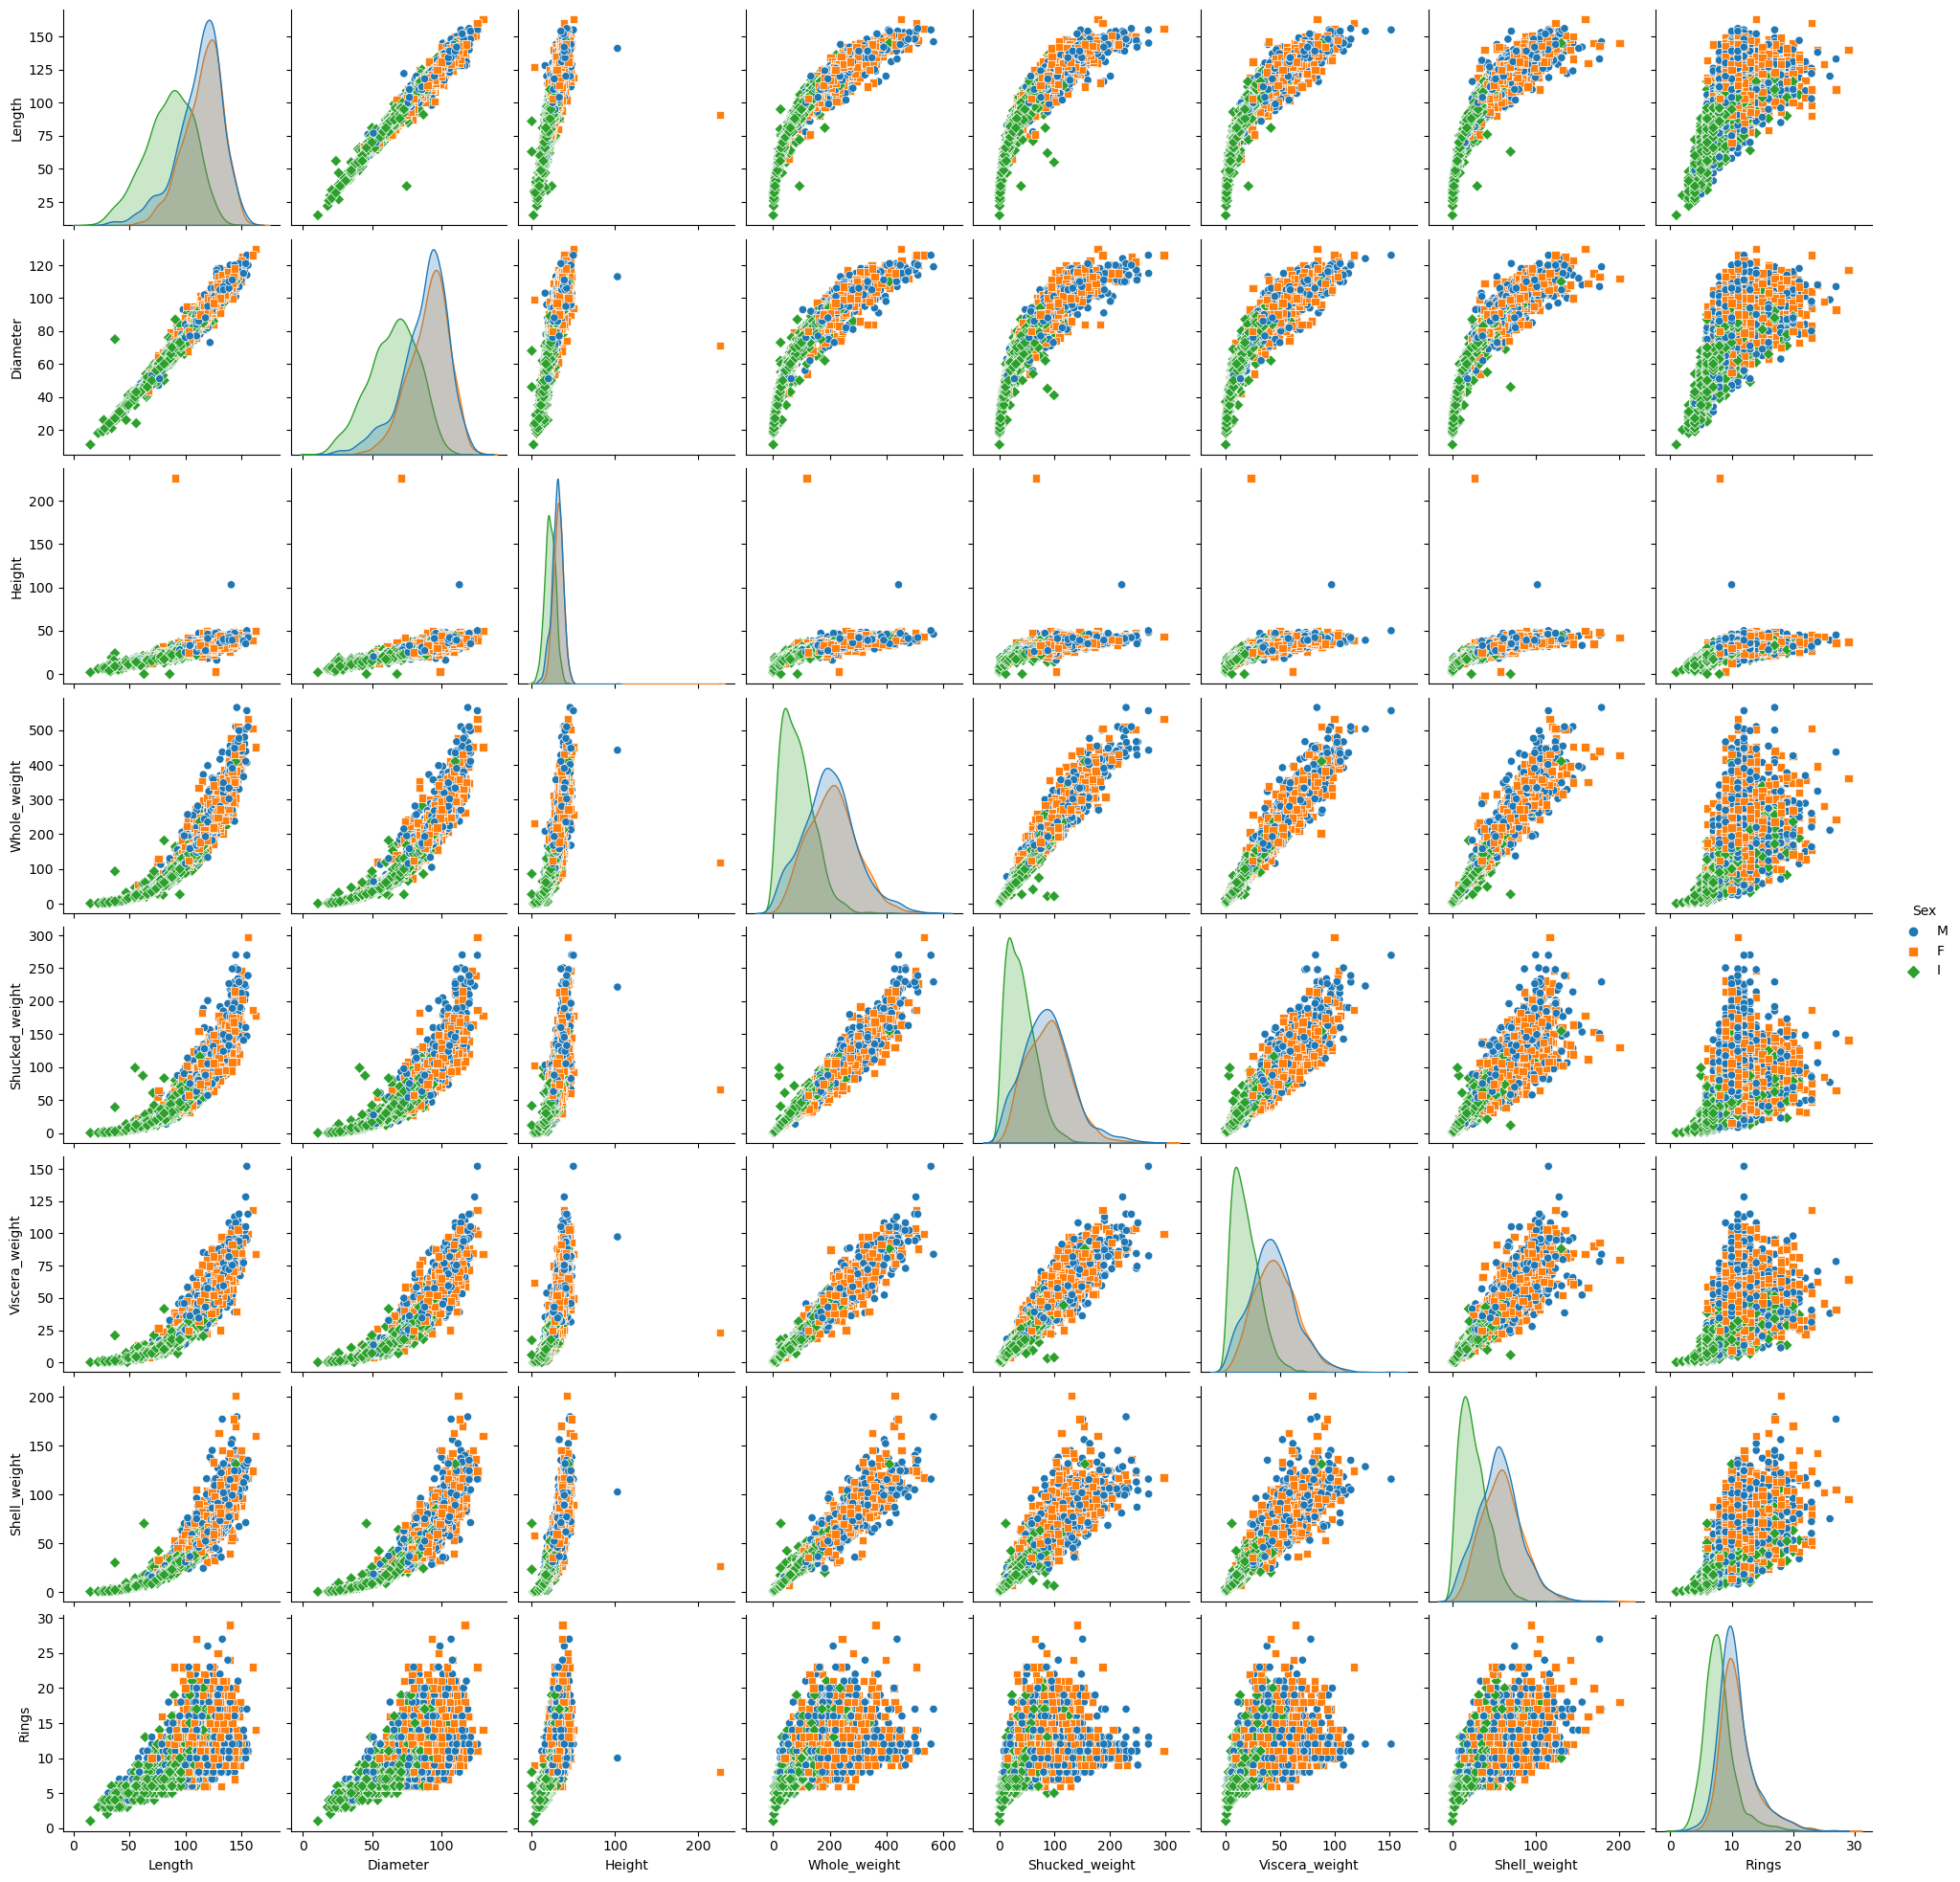

In [10]:
sns.pairplot(data_df, hue='Sex', markers=["o", "s", "D"])

## Data Visualization

D:\AllSoftwares\Anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\AllSoftwares\Anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\AllSoftwares\Anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\AllSoftwares\Anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

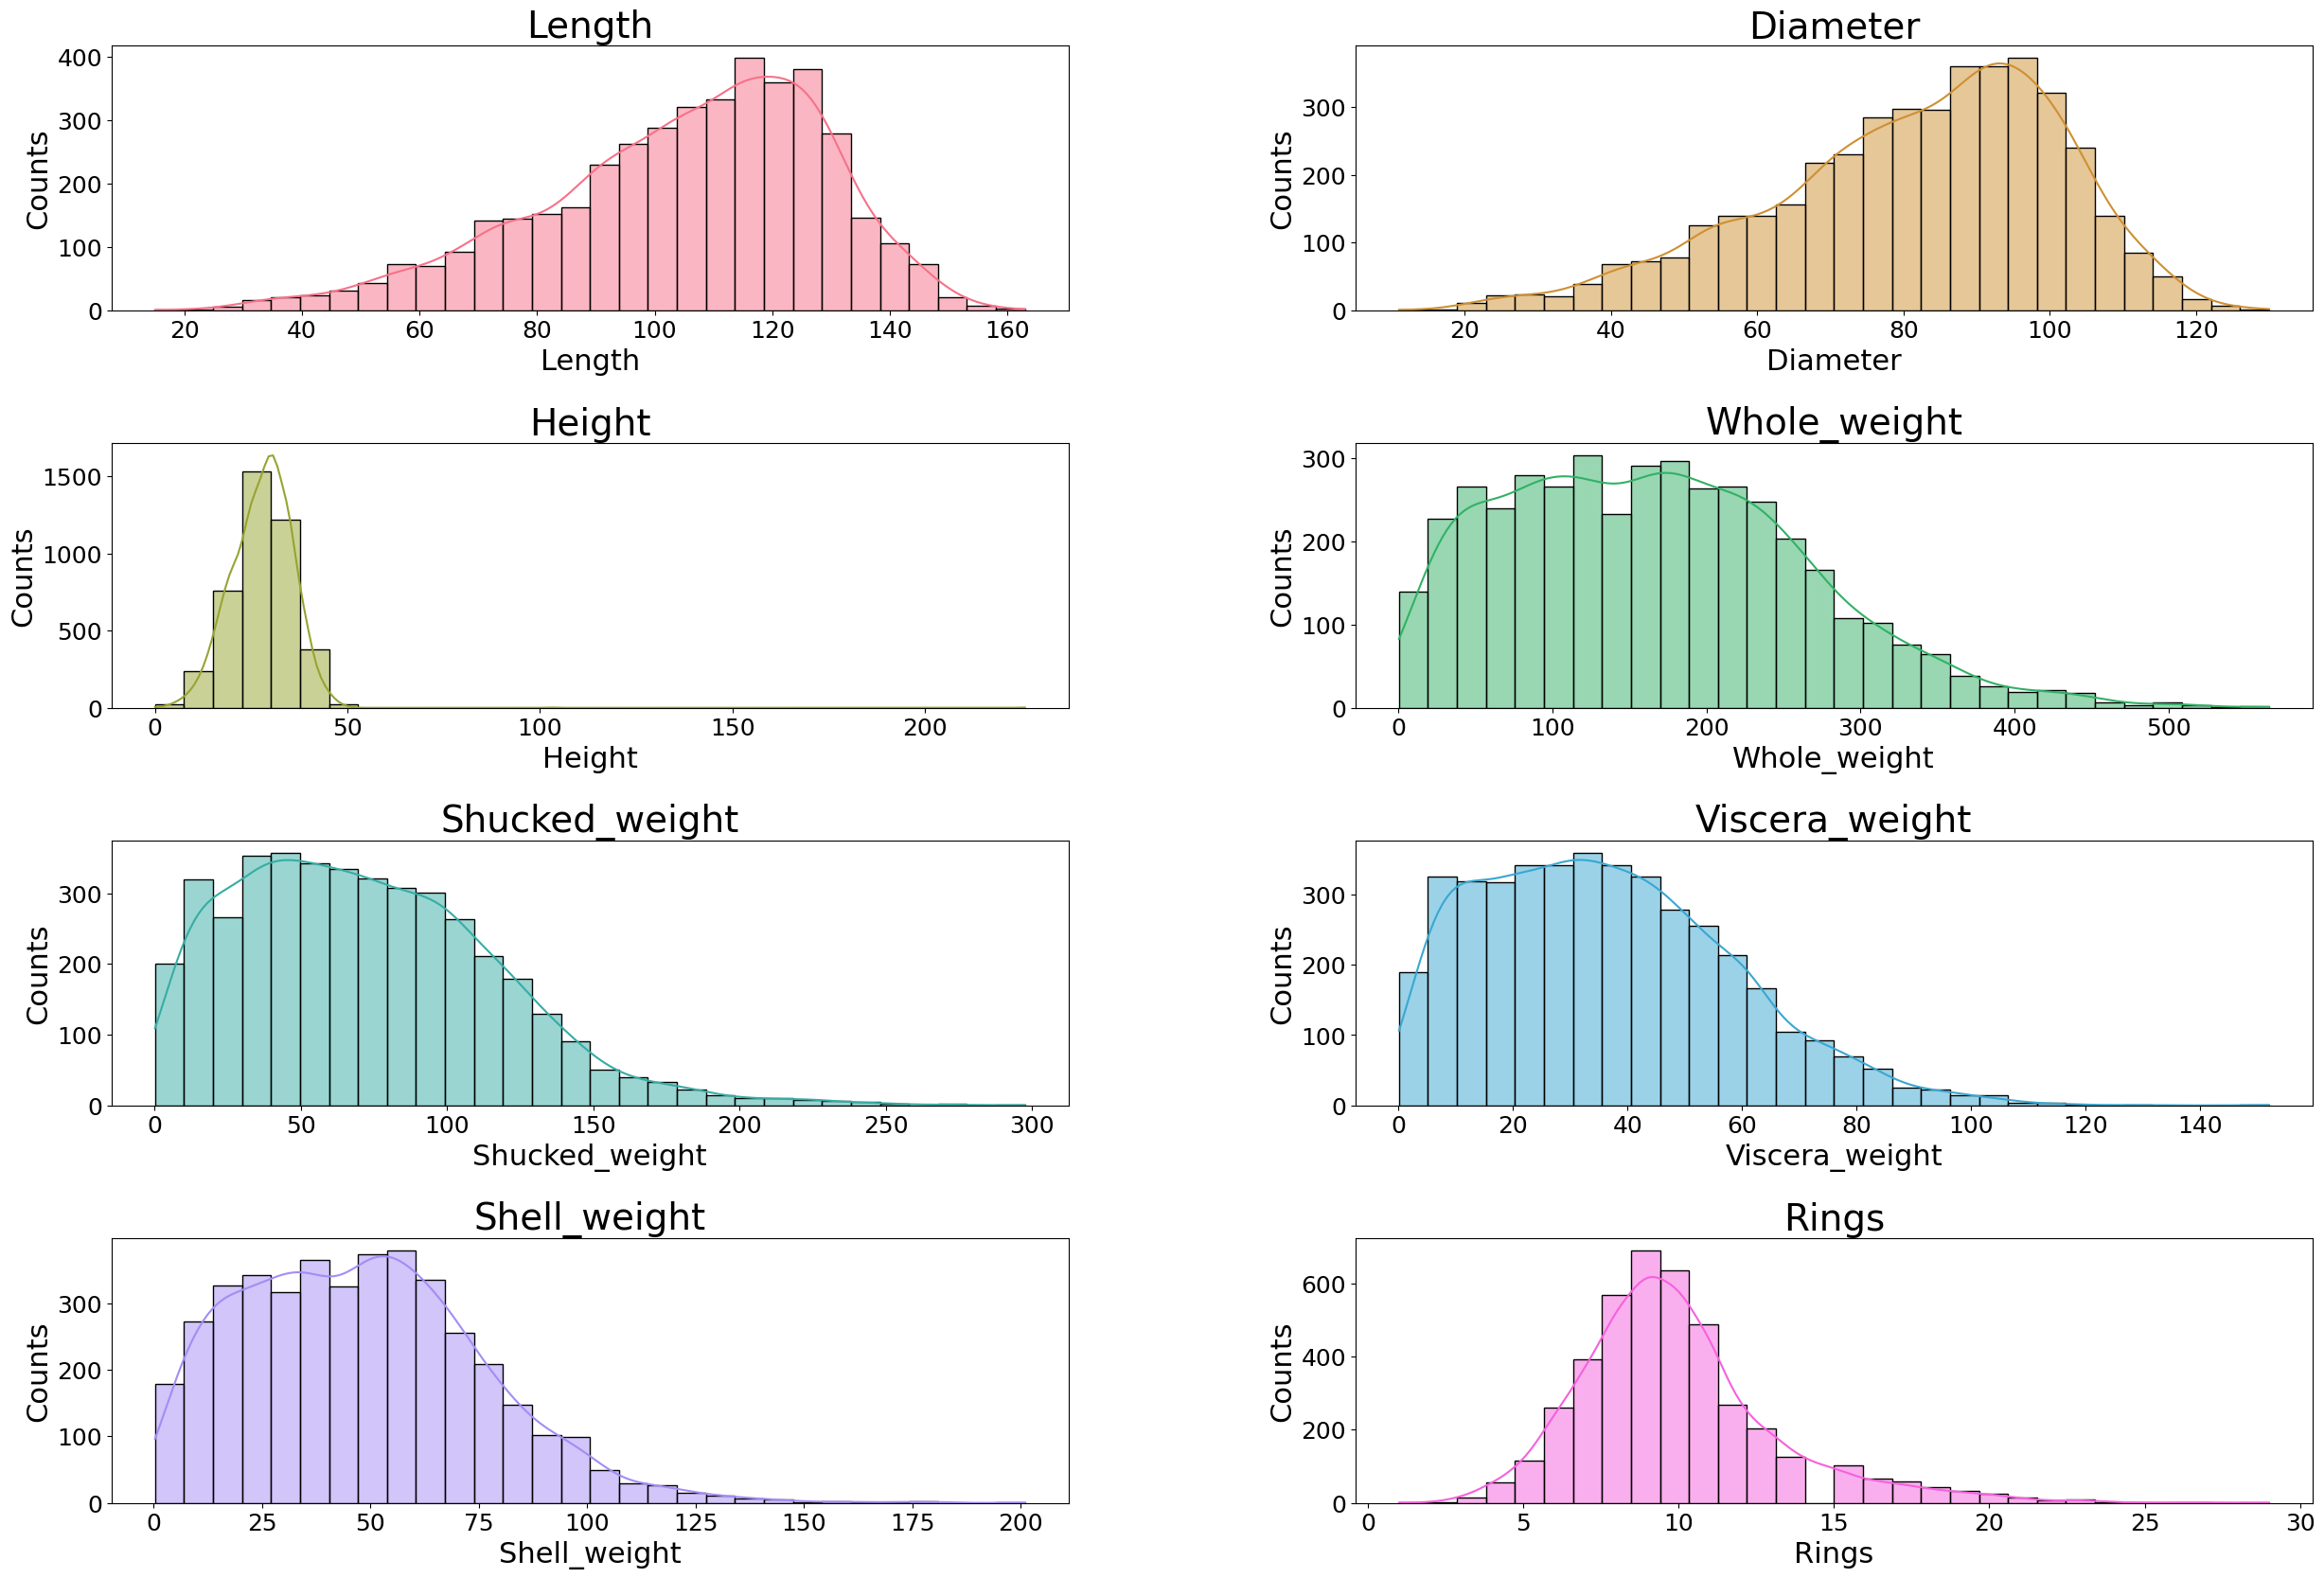

In [11]:
# single feature barplot
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(30,20))

for i, feature in enumerate(data_df.columns[1:9]):
    ax = axes[i // 2, i % 2]  # column index
    palette = sns.color_palette("husl", len(data_df.columns[1:9]))  # 生成颜色调色板
    sns.histplot(data_df[feature], bins=30, kde=True,ax = ax,color=palette[i])
    
    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)
    
    ax.set_title(feature,fontsize = 28)
    ax.set_ylabel('Counts',fontsize = 22)
    ax.set_xlabel(feature, fontsize = 22)
    
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

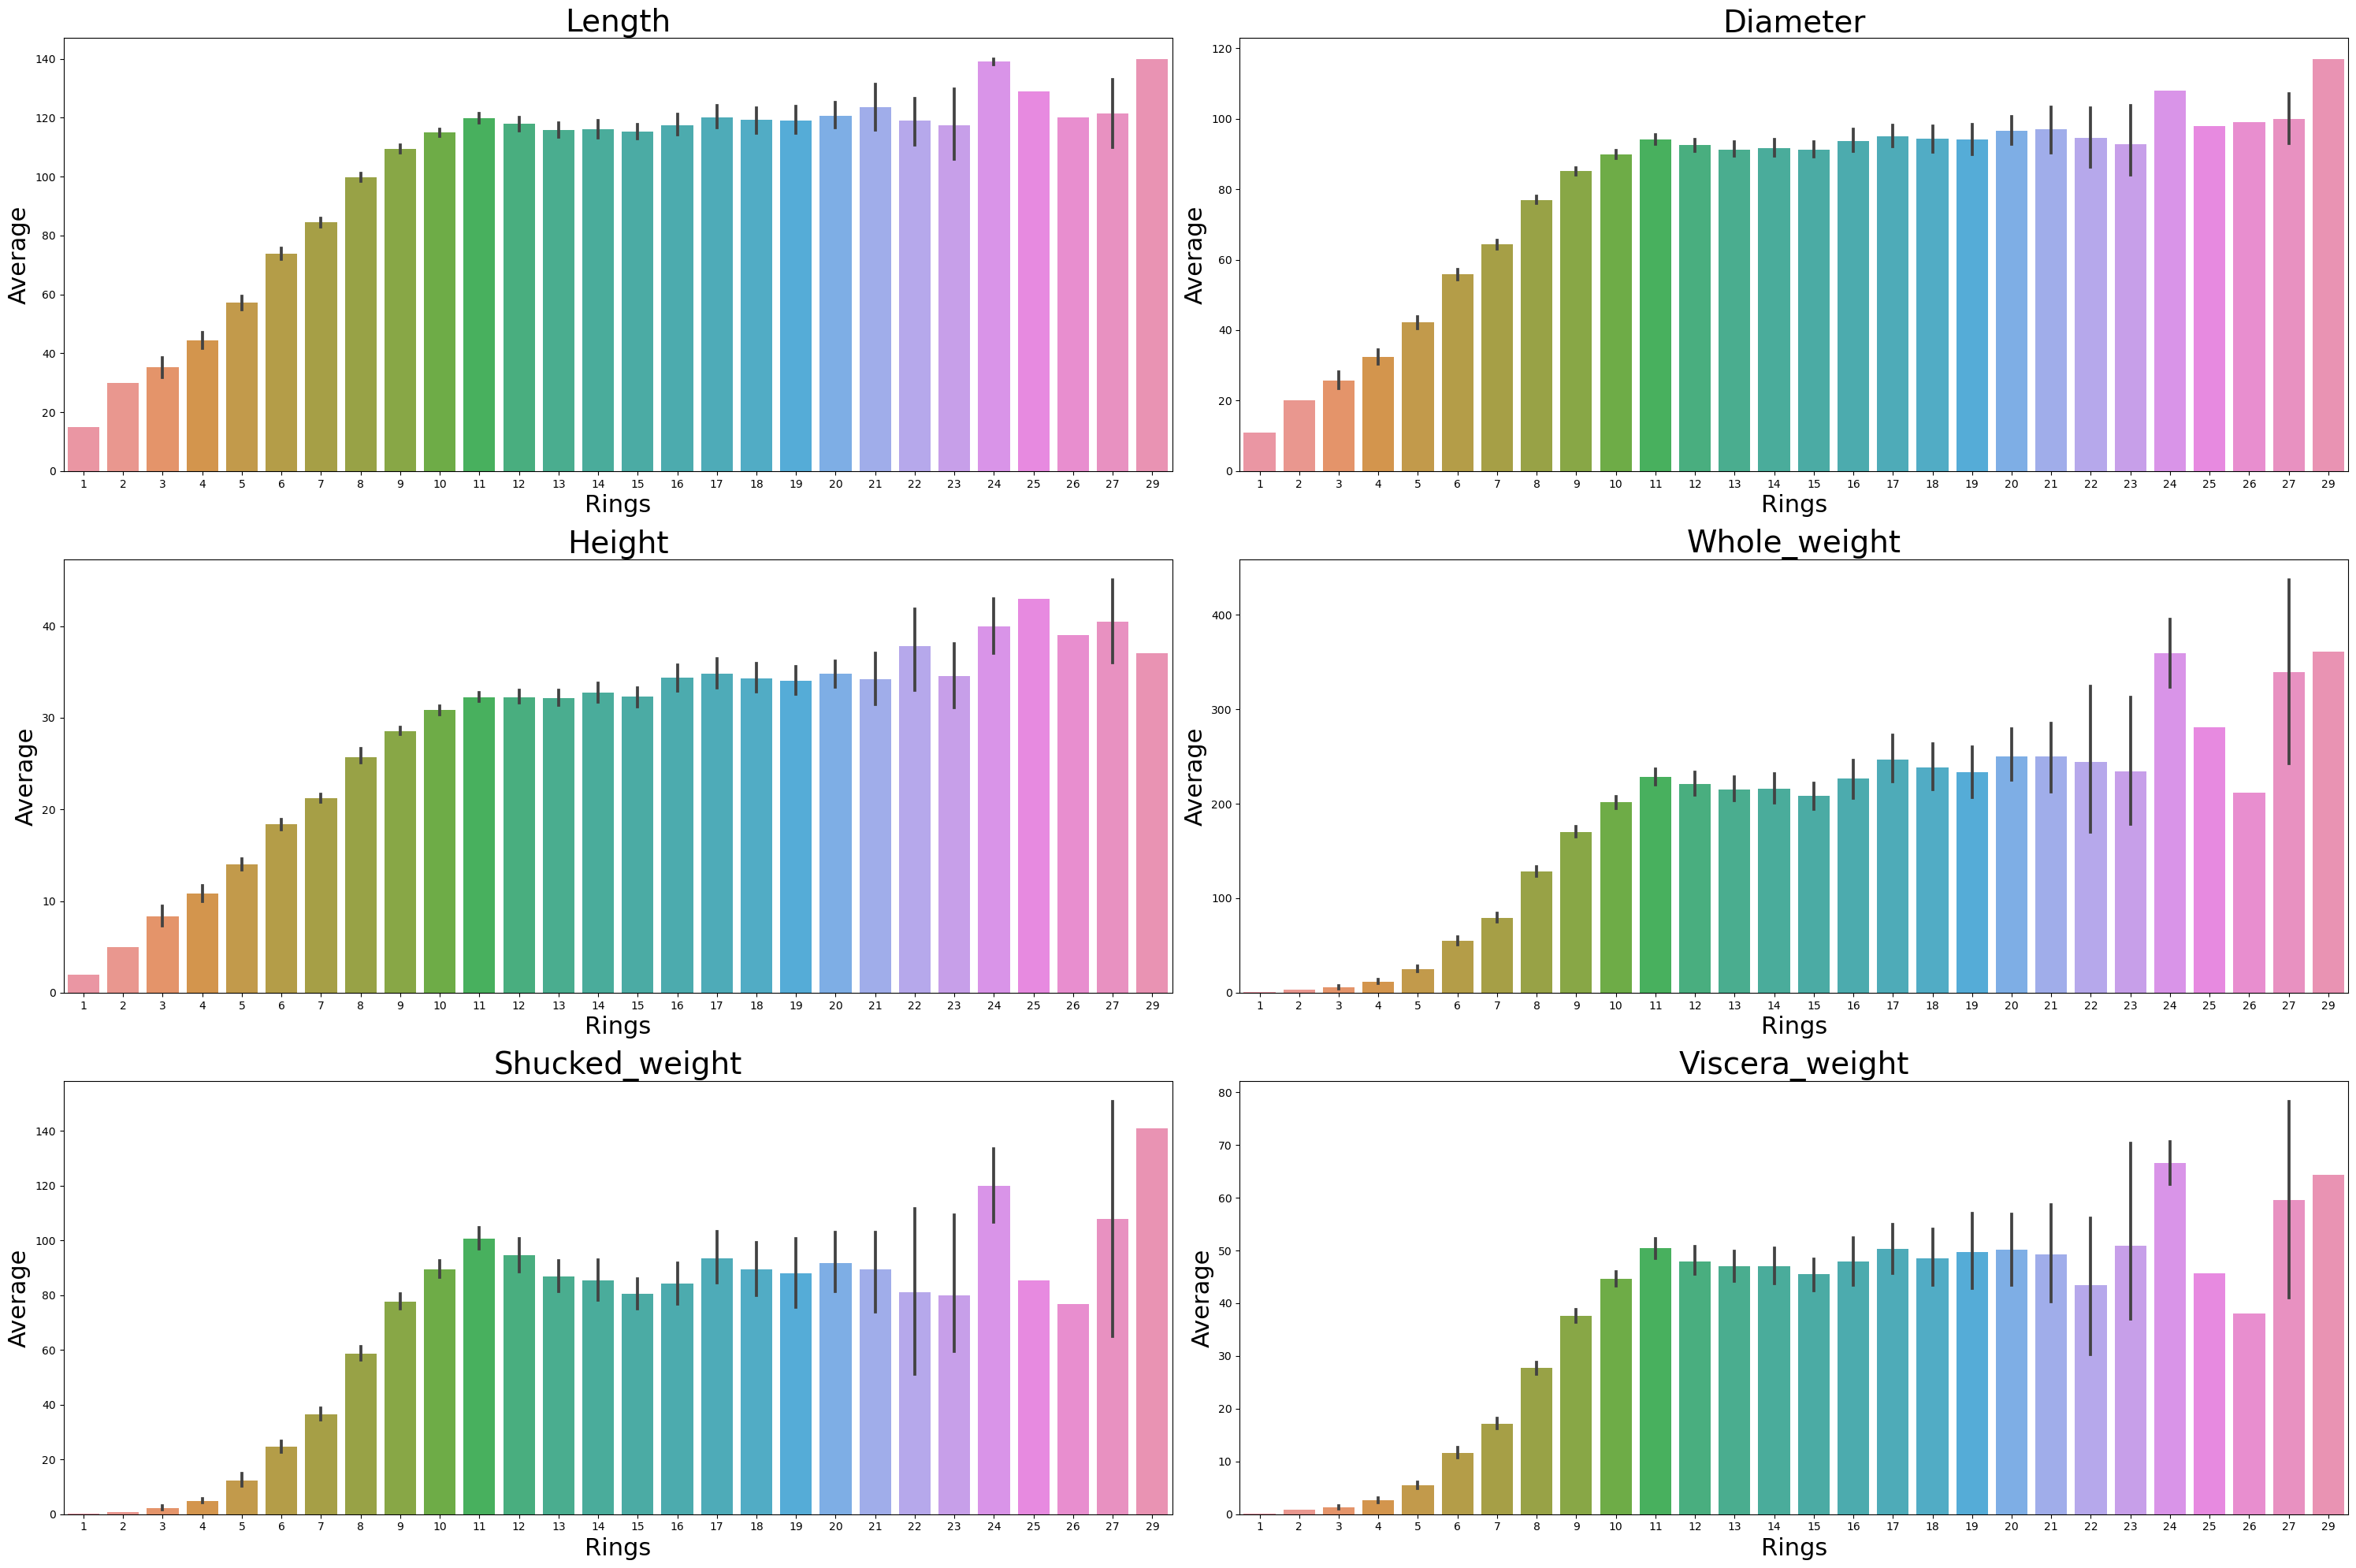

In [12]:
# single feature barplot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30,20))

for i, column in enumerate(data_df.columns[1:7]):
    ax = axes[i // 2, i % 2]  # column index
    sns.barplot(data = data_df,x = data_df['Rings'],y = column, ax = ax)
    ax.set_title(column, fontsize = 28)
    ax.set_ylabel('Average', fontsize = 22)
    ax.set_xlabel('Rings',fontsize = 22)

plt.tight_layout()

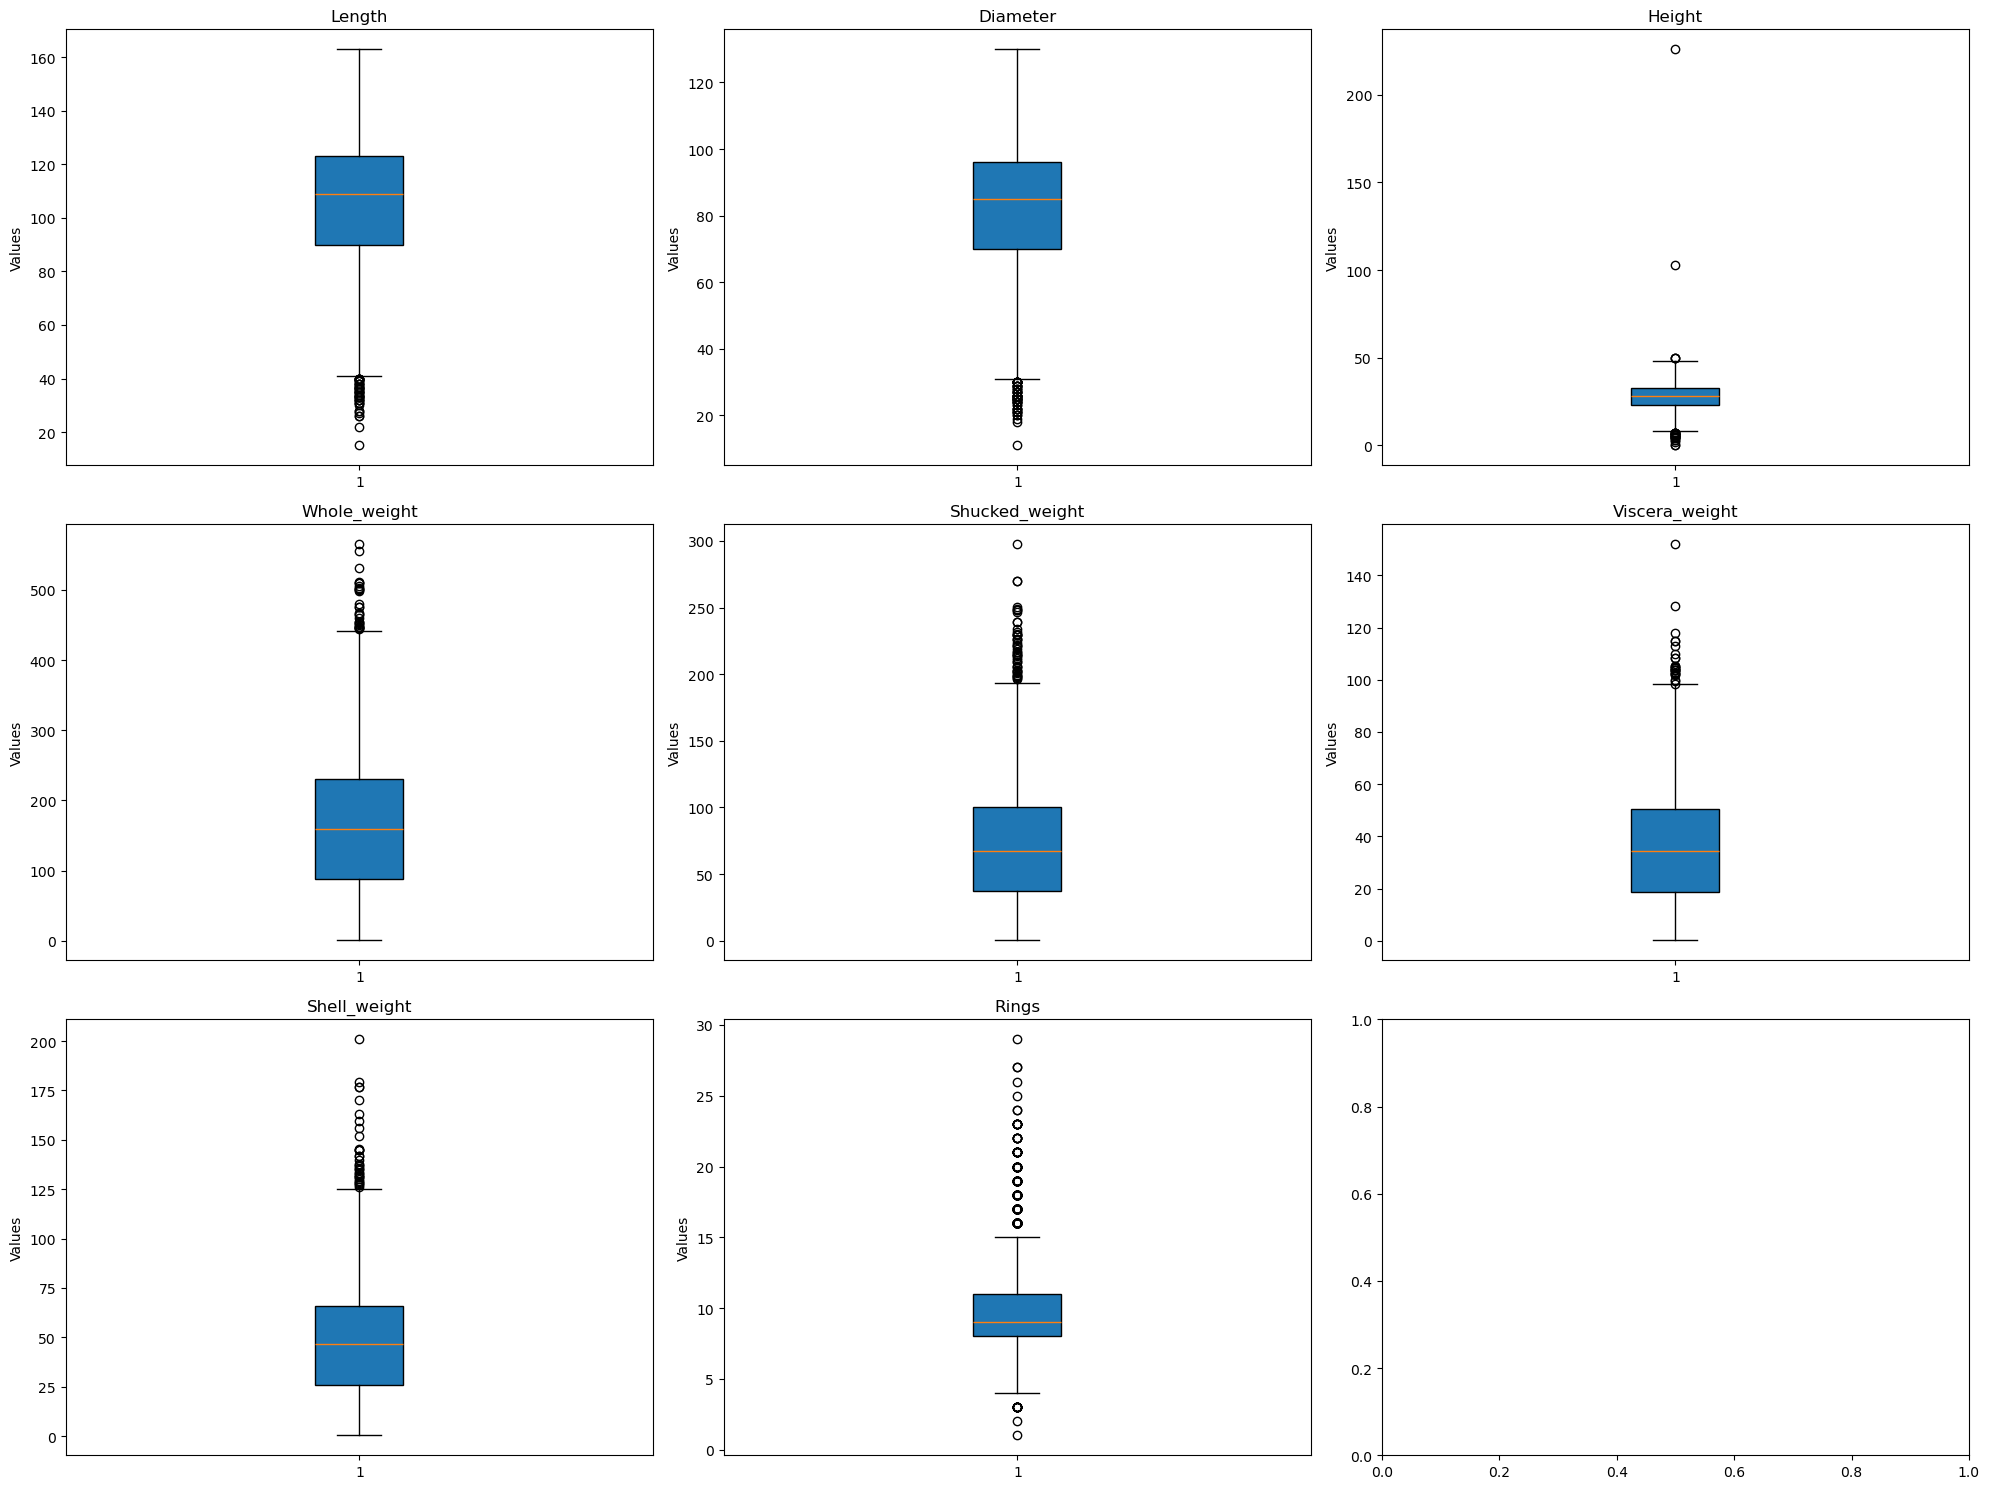

In [13]:
# single feature boxplot(include outliers)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,15))

for i, column in enumerate(data_df.columns[1:9]):
    ax = axes[i // 3, i % 3]  # column index
    ax.boxplot(data_df[column], patch_artist=True)
    ax.set_title(column)
    ax.set_ylabel("Values")

plt.tight_layout()

D:\AllSoftwares\Anaconda\anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


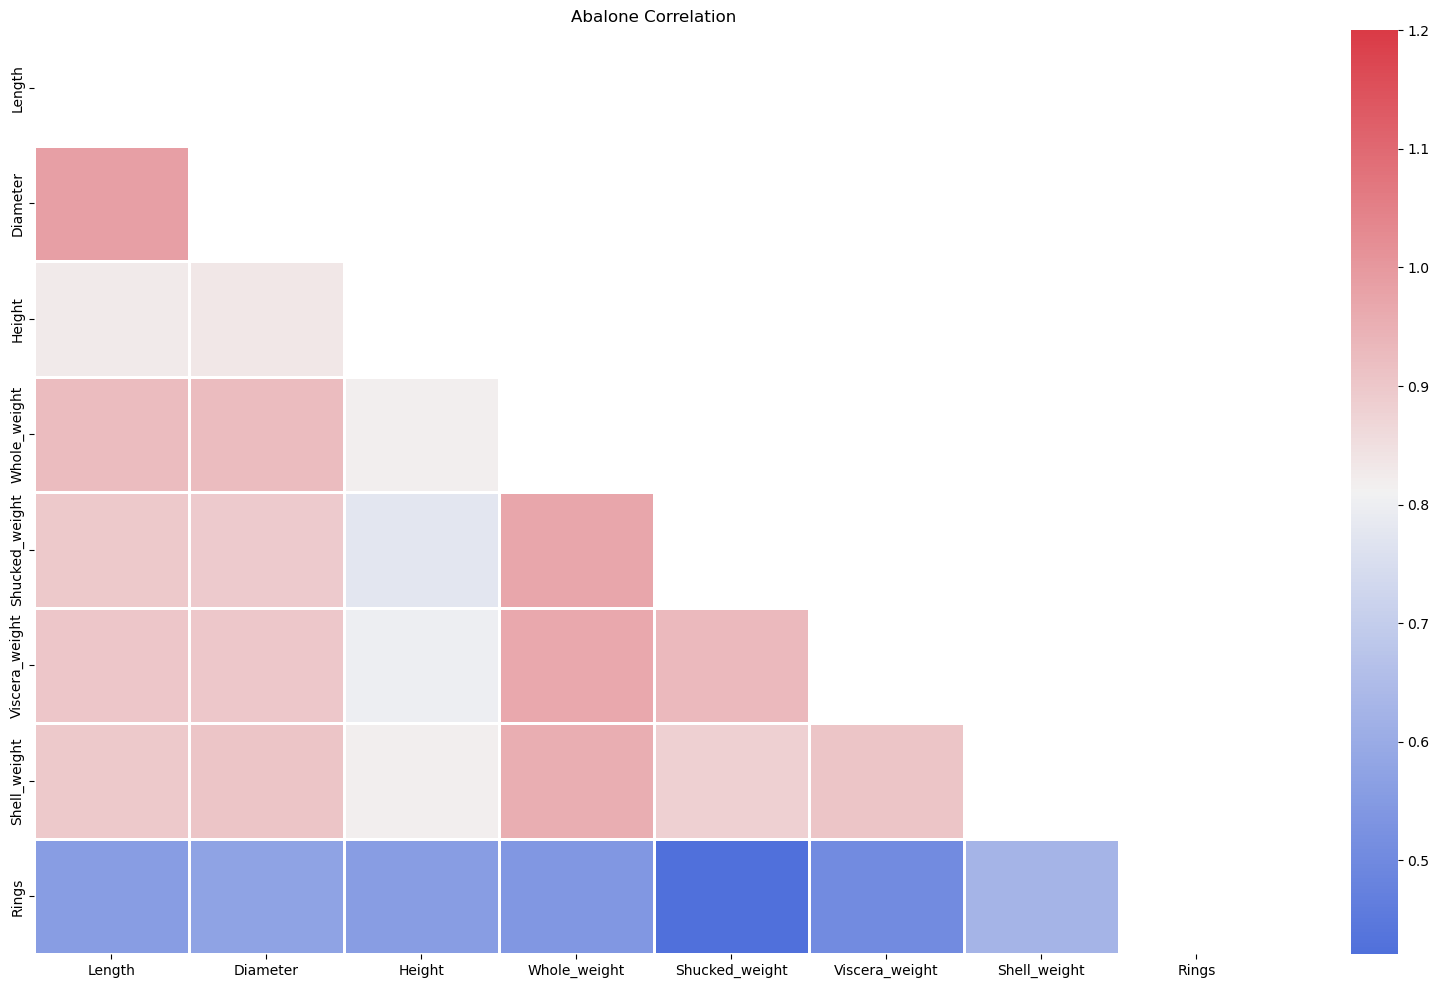

In [14]:
# correlation matrix
data_corrMatt = data_df.corr(numeric_only=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(data_corrMatt)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))
plt.title("Abalone Correlation")

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data_corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask, 
ax=ax, annot=True, fmt=".2g", linewidths=1);

## Data Preprocessing

### Use One-Hot Encoding to map 'Sex'

In [15]:
# Apply One-Hot Encoding to 'Sex'
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse_output=False)
Sex_encoded = cat_encoder.fit_transform(data_df[['Sex']])

Sex_encoded_df = pd.DataFrame(Sex_encoded, columns=cat_encoder.get_feature_names_out(['Sex']), index=data_df.index)
data_df = pd.concat([data_df.drop(columns=['Sex']), Sex_encoded_df], axis=1)

In [16]:
data_df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,91.0,73.0,19.0,102.8,44.9,20.2,30.0,15,0.0,0.0,1.0
1,70.0,53.0,18.0,45.1,19.9,9.7,14.0,7,0.0,0.0,1.0
2,106.0,84.0,27.0,135.4,51.3,28.3,42.0,9,1.0,0.0,0.0
3,88.0,73.0,25.0,103.2,43.1,22.8,31.0,10,0.0,0.0,1.0
4,66.0,51.0,16.0,41.0,17.9,7.9,11.0,7,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4172,113.0,90.0,33.0,177.4,74.0,47.8,49.8,11,1.0,0.0,0.0
4173,118.0,88.0,27.0,193.2,87.8,42.9,52.1,10,0.0,0.0,1.0
4174,120.0,95.0,41.0,235.2,105.1,57.5,61.6,9,0.0,0.0,1.0
4175,125.0,97.0,30.0,218.9,106.2,52.2,59.2,10,1.0,0.0,0.0


### Outliers Identification

In [17]:
data_df[data_df['Whole_weight'] < data_df['Shucked_weight']+data_df['Viscera_weight']+data_df['Shell_weight']]

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
42,48.0,35.0,9.0,14.0,6.3,4.7,4.0,5,0.0,1.0,0.0
43,41.0,30.0,11.0,8.4,5.1,3.0,2.4,5,0.0,1.0,0.0
44,42.0,30.0,10.0,8.4,3.5,2.5,3.0,4,0.0,1.0,0.0
45,78.0,59.0,19.0,40.6,17.5,9.0,15.0,7,0.0,1.0,0.0
46,94.0,74.0,24.0,115.9,58.6,45.4,28.0,9,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3963,54.0,41.0,15.0,23.6,11.8,6.2,6.1,4,0.0,1.0,0.0
3969,76.0,60.0,18.0,55.4,33.1,12.5,16.4,6,0.0,1.0,0.0
3996,63.0,46.0,0.0,26.8,11.5,5.7,70.1,6,0.0,1.0,0.0
4046,120.0,92.0,31.0,133.1,57.0,29.8,53.8,11,0.0,0.0,1.0


In [18]:
data_df[data_df['Height']==0]

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
1257,86.0,68.0,0.0,85.6,41.3,17.2,23.0,8,0.0,1.0,0.0
3996,63.0,46.0,0.0,26.8,11.5,5.7,70.1,6,0.0,1.0,0.0


In [19]:
# Define a function to identify outliers using the IQR method
def identify_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Create a DataFrame to store deleted outliers
outliers_df = pd.DataFrame(columns=data_df.columns.tolist() + ['Outlier_Feature'])

# Identify outliers and remove them
data_feature = data_df.drop(columns=['Rings'])
for feature in data_feature.columns:
    lower_bound, upper_bound = identify_outliers_iqr(data_df, feature)
    outliers = data_df[(data_df[feature] < lower_bound) | (data_df[feature] > upper_bound)]
    if not outliers.empty:
        outliers = outliers.copy()
        outliers['Outlier_Feature'] = feature
        outliers_df = pd.concat([outliers_df, outliers])
    
    #Remove these outliers from data_no_outliers
    data_no_outliers = data_df[~data_df.index.isin(outliers_df.index)]

data_no_outliers

C:\Users\24522\AppData\Local\Temp\ipykernel_32728\1088667878.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outliers_df = pd.concat([outliers_df, outliers])


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,91.0,73.0,19.0,102.8,44.9,20.2,30.0,15,0.0,0.0,1.0
1,70.0,53.0,18.0,45.1,19.9,9.7,14.0,7,0.0,0.0,1.0
2,106.0,84.0,27.0,135.4,51.3,28.3,42.0,9,1.0,0.0,0.0
3,88.0,73.0,25.0,103.2,43.1,22.8,31.0,10,0.0,0.0,1.0
4,66.0,51.0,16.0,41.0,17.9,7.9,11.0,7,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4172,113.0,90.0,33.0,177.4,74.0,47.8,49.8,11,1.0,0.0,0.0
4173,118.0,88.0,27.0,193.2,87.8,42.9,52.1,10,0.0,0.0,1.0
4174,120.0,95.0,41.0,235.2,105.1,57.5,61.6,9,0.0,0.0,1.0
4175,125.0,97.0,30.0,218.9,106.2,52.2,59.2,10,1.0,0.0,0.0


In [20]:
outliers_df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M,Outlier_Feature
148,35.0,26.0,11.0,6.3,2.1,1.3,2.5,5,0.0,1.0,0.0,Length
149,34.0,26.0,19.0,6.0,2.6,1.6,2.0,4,0.0,1.0,0.0,Length
236,15.0,11.0,2.0,0.4,0.2,0.1,0.3,1,0.0,1.0,0.0,Length
237,26.0,20.0,6.0,2.6,0.9,0.6,0.8,3,0.0,1.0,0.0,Length
238,22.0,18.0,6.0,1.6,0.5,0.4,0.6,3,0.0,1.0,0.0,Length
...,...,...,...,...,...,...,...,...,...,...,...,...
3151,133.0,100.0,35.0,348.4,119.0,60.5,145.0,21,1.0,0.0,0.0,Shell_weight
3188,144.0,115.0,46.0,453.9,176.7,79.7,133.0,16,0.0,0.0,1.0,Shell_weight
3715,156.0,120.0,42.0,509.6,238.9,114.9,134.9,11,0.0,0.0,1.0,Shell_weight
3928,145.0,110.0,44.0,409.9,154.7,88.1,131.0,10,0.0,1.0,0.0,Shell_weight


### Normalization

In [21]:
# Min-Max normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_array = scaler.fit_transform(data_no_outliers)
data_scaled = pd.DataFrame(scaled_array, columns=data_no_outliers.columns,index=data_no_outliers.index)
data_scaled

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.450450,0.471910,0.275,0.225868,0.220042,0.204476,0.223856,0.461538,0.0,0.0,1.0
1,0.261261,0.247191,0.250,0.087665,0.087487,0.097660,0.093137,0.153846,0.0,0.0,1.0
2,0.585586,0.595506,0.475,0.303952,0.253977,0.286877,0.321895,0.230769,1.0,0.0,0.0
3,0.423423,0.471910,0.425,0.226826,0.210498,0.230926,0.232026,0.269231,0.0,0.0,1.0
4,0.225225,0.224719,0.200,0.077844,0.076882,0.079349,0.068627,0.153846,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.648649,0.662921,0.625,0.404551,0.374337,0.485249,0.385621,0.307692,1.0,0.0,0.0
4173,0.693694,0.640449,0.475,0.442395,0.447508,0.435402,0.404412,0.269231,0.0,0.0,1.0
4174,0.711712,0.719101,0.825,0.542994,0.539236,0.583927,0.482026,0.230769,0.0,0.0,1.0
4175,0.756757,0.741573,0.550,0.503952,0.545069,0.530010,0.462418,0.269231,1.0,0.0,0.0


### Multicollinearity Identification

In [22]:
data_feature = data_scaled.drop(columns = ['Rings'])
data_target = data_scaled['Rings']

In [23]:
# Use OLS model to analyze the impact of target on a feature
import statsmodels.api as sm

# Add constant
fea_train = sm.add_constant(data_feature)

# create OLS model
model = sm.OLS(data_target, data_feature).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     487.1
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:40:48   Log-Likelihood:                 4303.8
No. Observations:                4024   AIC:                            -8588.
Df Residuals:                    4014   BIC:                            -8525.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Length            -0.0519      0.041     -1.

In [24]:
# Use VIF score to check for multicollinearity among features
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = data_feature.columns
vif_data['VIF'] = [variance_inflation_factor(data_feature.values, i) for i in range(data_feature.shape[1])]

print(vif_data)

          Feature         VIF
0          Length   38.594425
1        Diameter   39.636449
2          Height    6.361020
3    Whole_weight  100.364415
4  Shucked_weight   26.371464
5  Viscera_weight   16.189250
6    Shell_weight   22.225964
7           Sex_F    9.359129
8           Sex_I    6.760253
9           Sex_M    9.972303


In [25]:
'''
 Based on the scatter plot between 'Length' and 'Diameter', as well as high P-values and high VIF scores,
 we can conclude that 'Length' and 'Diameter' are highly correlated. To reduce multicollinearity,
 we have decided to remove 'Length' from the dataset.
'''

data_no_outliers = data_no_outliers.drop(columns=['Length'])

In [26]:
'''
 To deal with the high VIF scores on 'Whole_weight', 'Shucked_weight', 'Viscera_weight' and 'Shell_weight',
 we define three equation to combine them.
'''

df = data_no_outliers
df['shucked_weight_ratio'] = df['Shucked_weight'] / (df['Whole_weight'] + 1)
df['viscera_weight_ratio'] = df['Viscera_weight'] / (df['Whole_weight'] + 1)
df['shell_weight_ratio'] = df['Shell_weight'] / (df['Whole_weight'] + 1)

lower_bound = 0
upper_bound = 0.8
df = df[(df['shucked_weight_ratio'] >= lower_bound) & (df['shucked_weight_ratio'] <= upper_bound)]
df = df[(df['viscera_weight_ratio'] >= lower_bound) & (df['viscera_weight_ratio'] <= upper_bound)]
df = df[(df['shell_weight_ratio'] >= lower_bound) & (df['shell_weight_ratio'] <= upper_bound)]

data_combined = df.drop(columns=['Whole_weight','Shucked_weight','Viscera_weight','Shell_weight'])
data_combined

,Diameter,Height,Rings,Sex_F,Sex_I,Sex_M,shucked_weight_ratio,viscera_weight_ratio,shell_weight_ratio
0,73.0,19.0,15,0.0,0.0,1.0,0.432563,0.194605,0.289017
1,53.0,18.0,7,0.0,0.0,1.0,0.431670,0.210412,0.303688
2,84.0,27.0,9,1.0,0.0,0.0,0.376100,0.207478,0.307918
3,73.0,25.0,10,0.0,0.0,1.0,0.413628,0.218810,0.297505
4,51.0,16.0,7,0.0,1.0,0.0,0.426190,0.188095,0.261905
...,...,...,...,...,...,...,...,...,...
4172,90.0,33.0,11,1.0,0.0,0.0,0.414798,0.267937,0.279148
4173,88.0,27.0,10,0.0,0.0,1.0,0.452111,0.220906,0.268280
4174,95.0,41.0,9,0.0,0.0,1.0,0.444962,0.243438,0.260796
4175,97.0,30.0,10,1.0,0.0,0.0,0.482947,0.237381,0.269213


In [27]:
data_combined_feature = data_combined.drop(columns=['Rings'])

vif_data = pd.DataFrame()
vif_data['Feature'] = data_combined_feature.columns
vif_data['VIF'] = [variance_inflation_factor(data_combined_feature.values, i) for i in range(data_combined_feature.shape[1])]

print(vif_data)

                Feature         VIF
0              Diameter    5.724676
1                Height    5.434606
2                 Sex_F  149.793655
3                 Sex_I  148.912363
4                 Sex_M  172.784866
5  shucked_weight_ratio    1.836315
6  viscera_weight_ratio    1.135181
7    shell_weight_ratio    1.719774


D:\AllSoftwares\Anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\AllSoftwares\Anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\AllSoftwares\Anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\AllSoftwares\Anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

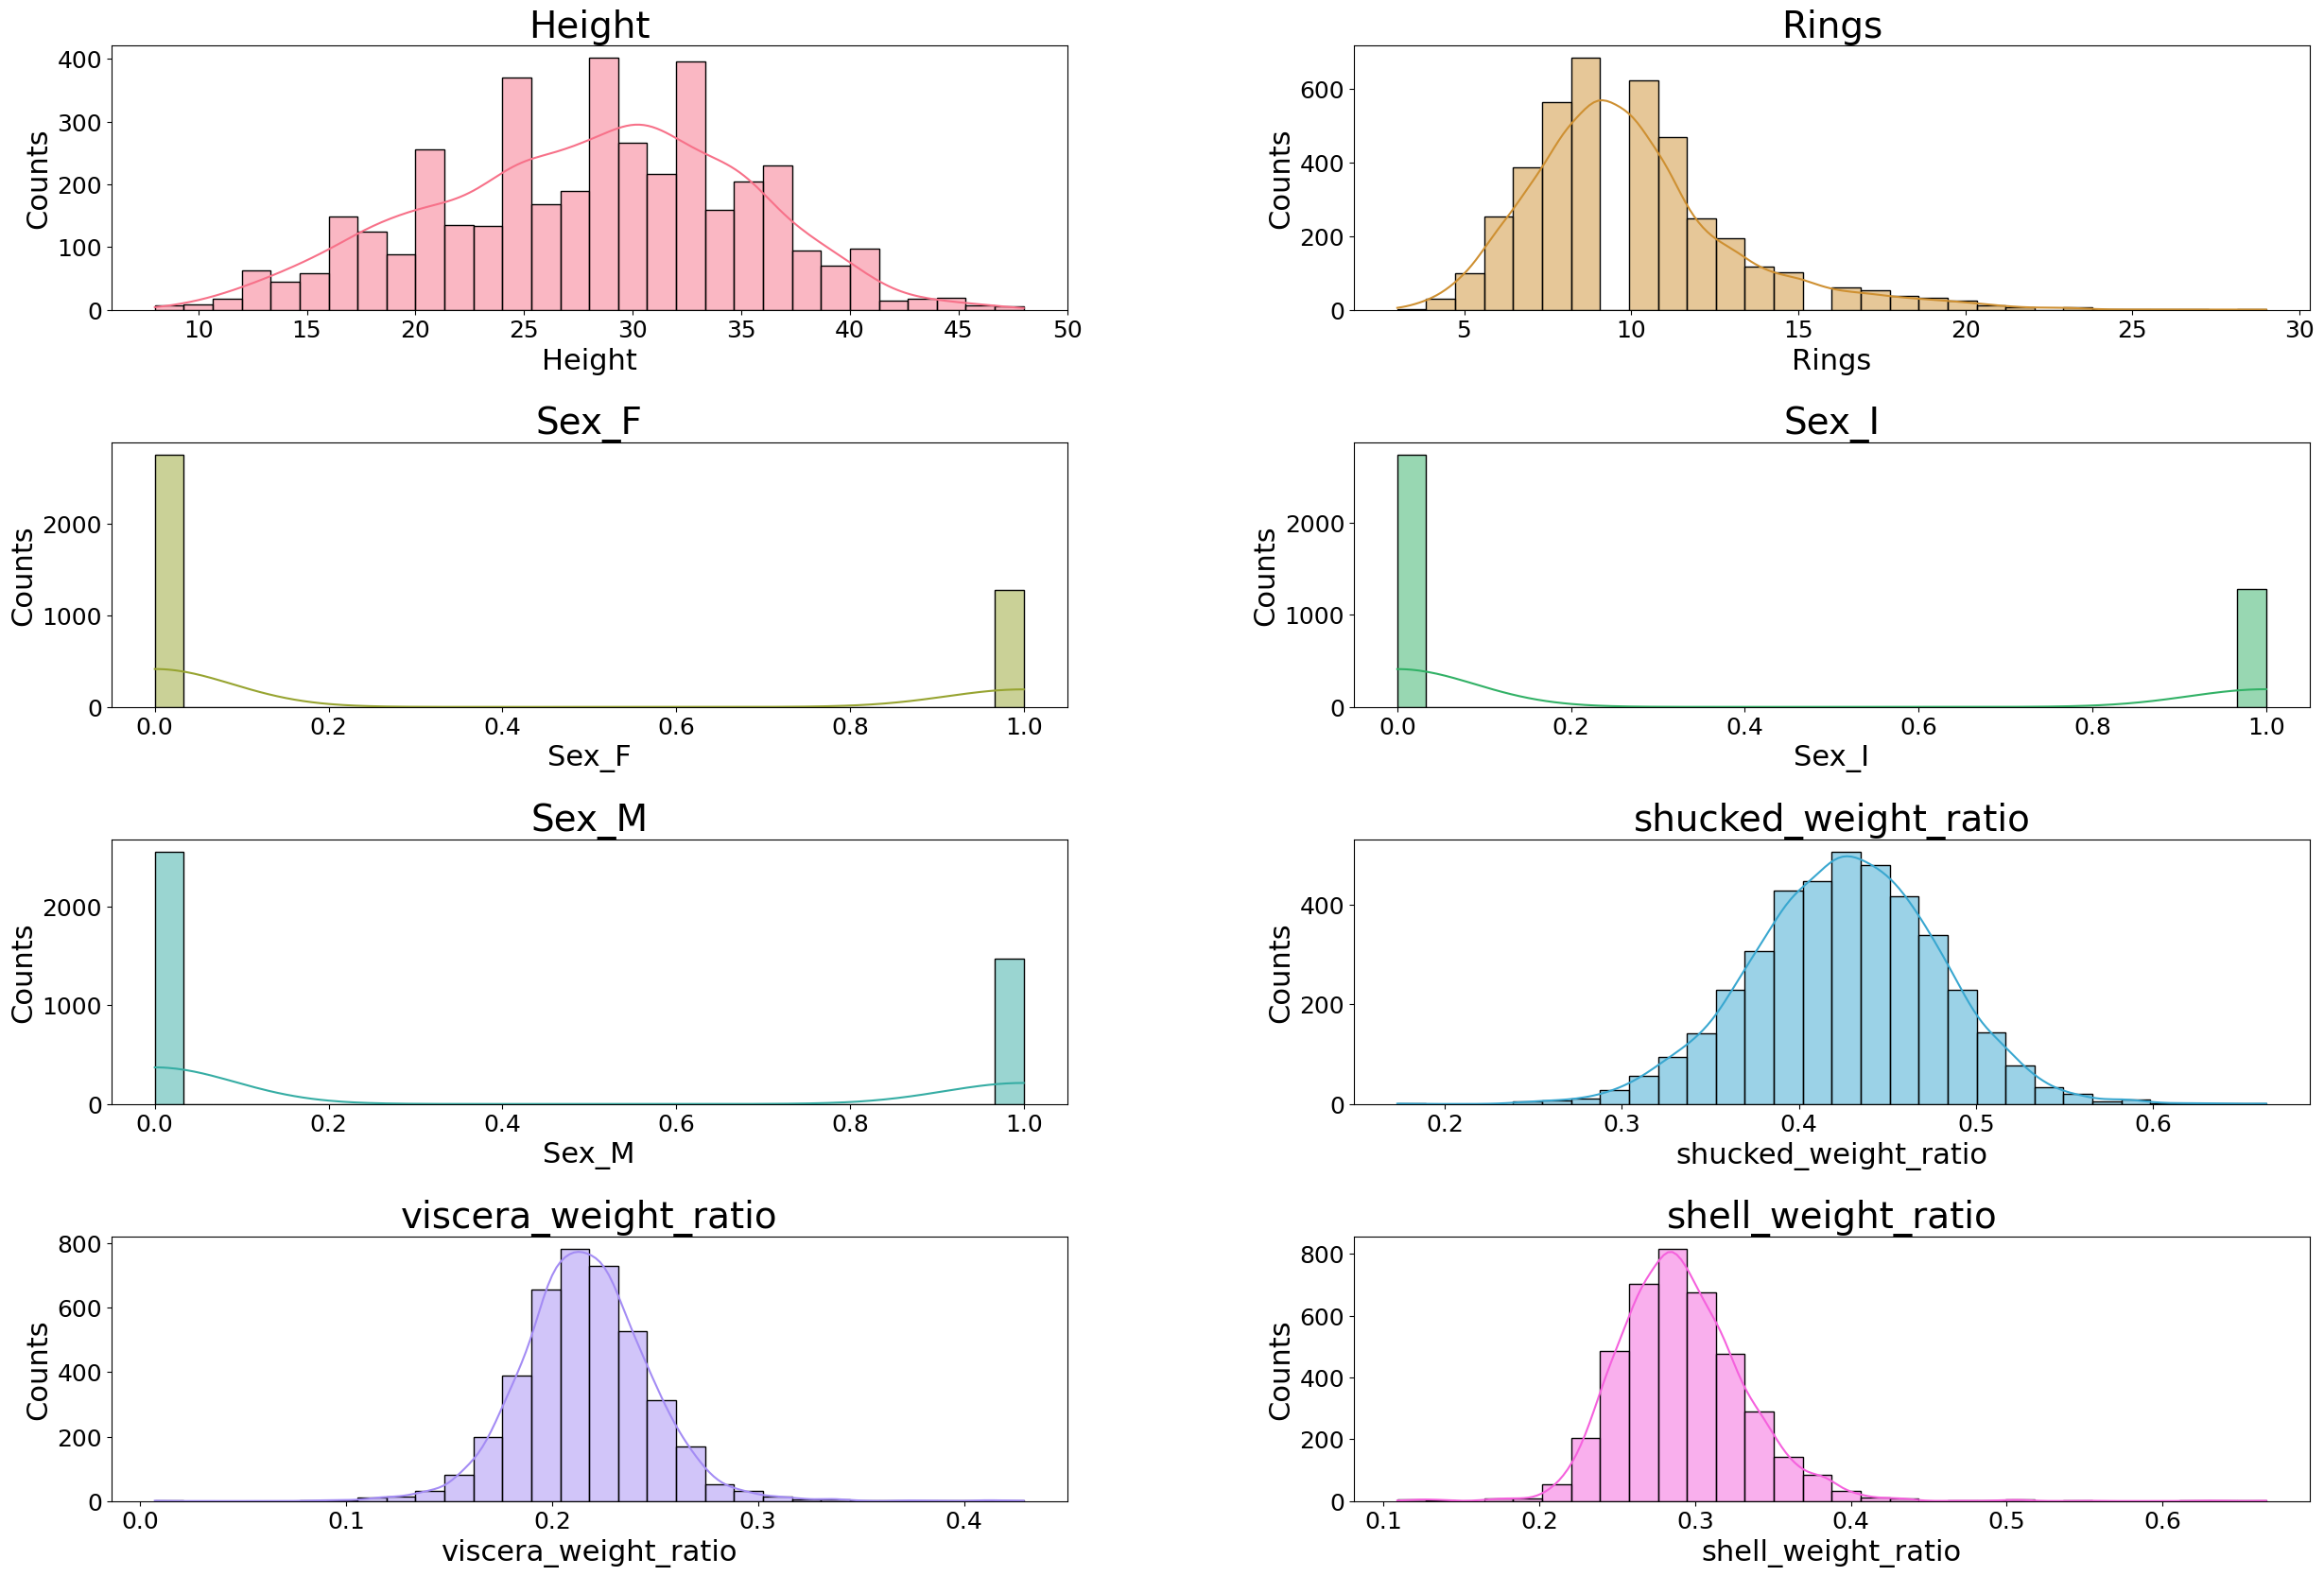

In [28]:
# single feature barplot
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(30,20))

for i, feature in enumerate(data_combined.columns[1:9]):
    ax = axes[i // 2, i % 2]  # column index
    palette = sns.color_palette("husl", len(data_combined.columns[1:9]))  # 生成颜色调色板
    sns.histplot(data_combined[feature], bins=30, kde=True,ax = ax,color=palette[i])
    
    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)
    
    ax.set_title(feature,fontsize = 28)
    ax.set_ylabel('Counts',fontsize = 22)
    ax.set_xlabel(feature, fontsize = 22)
    
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

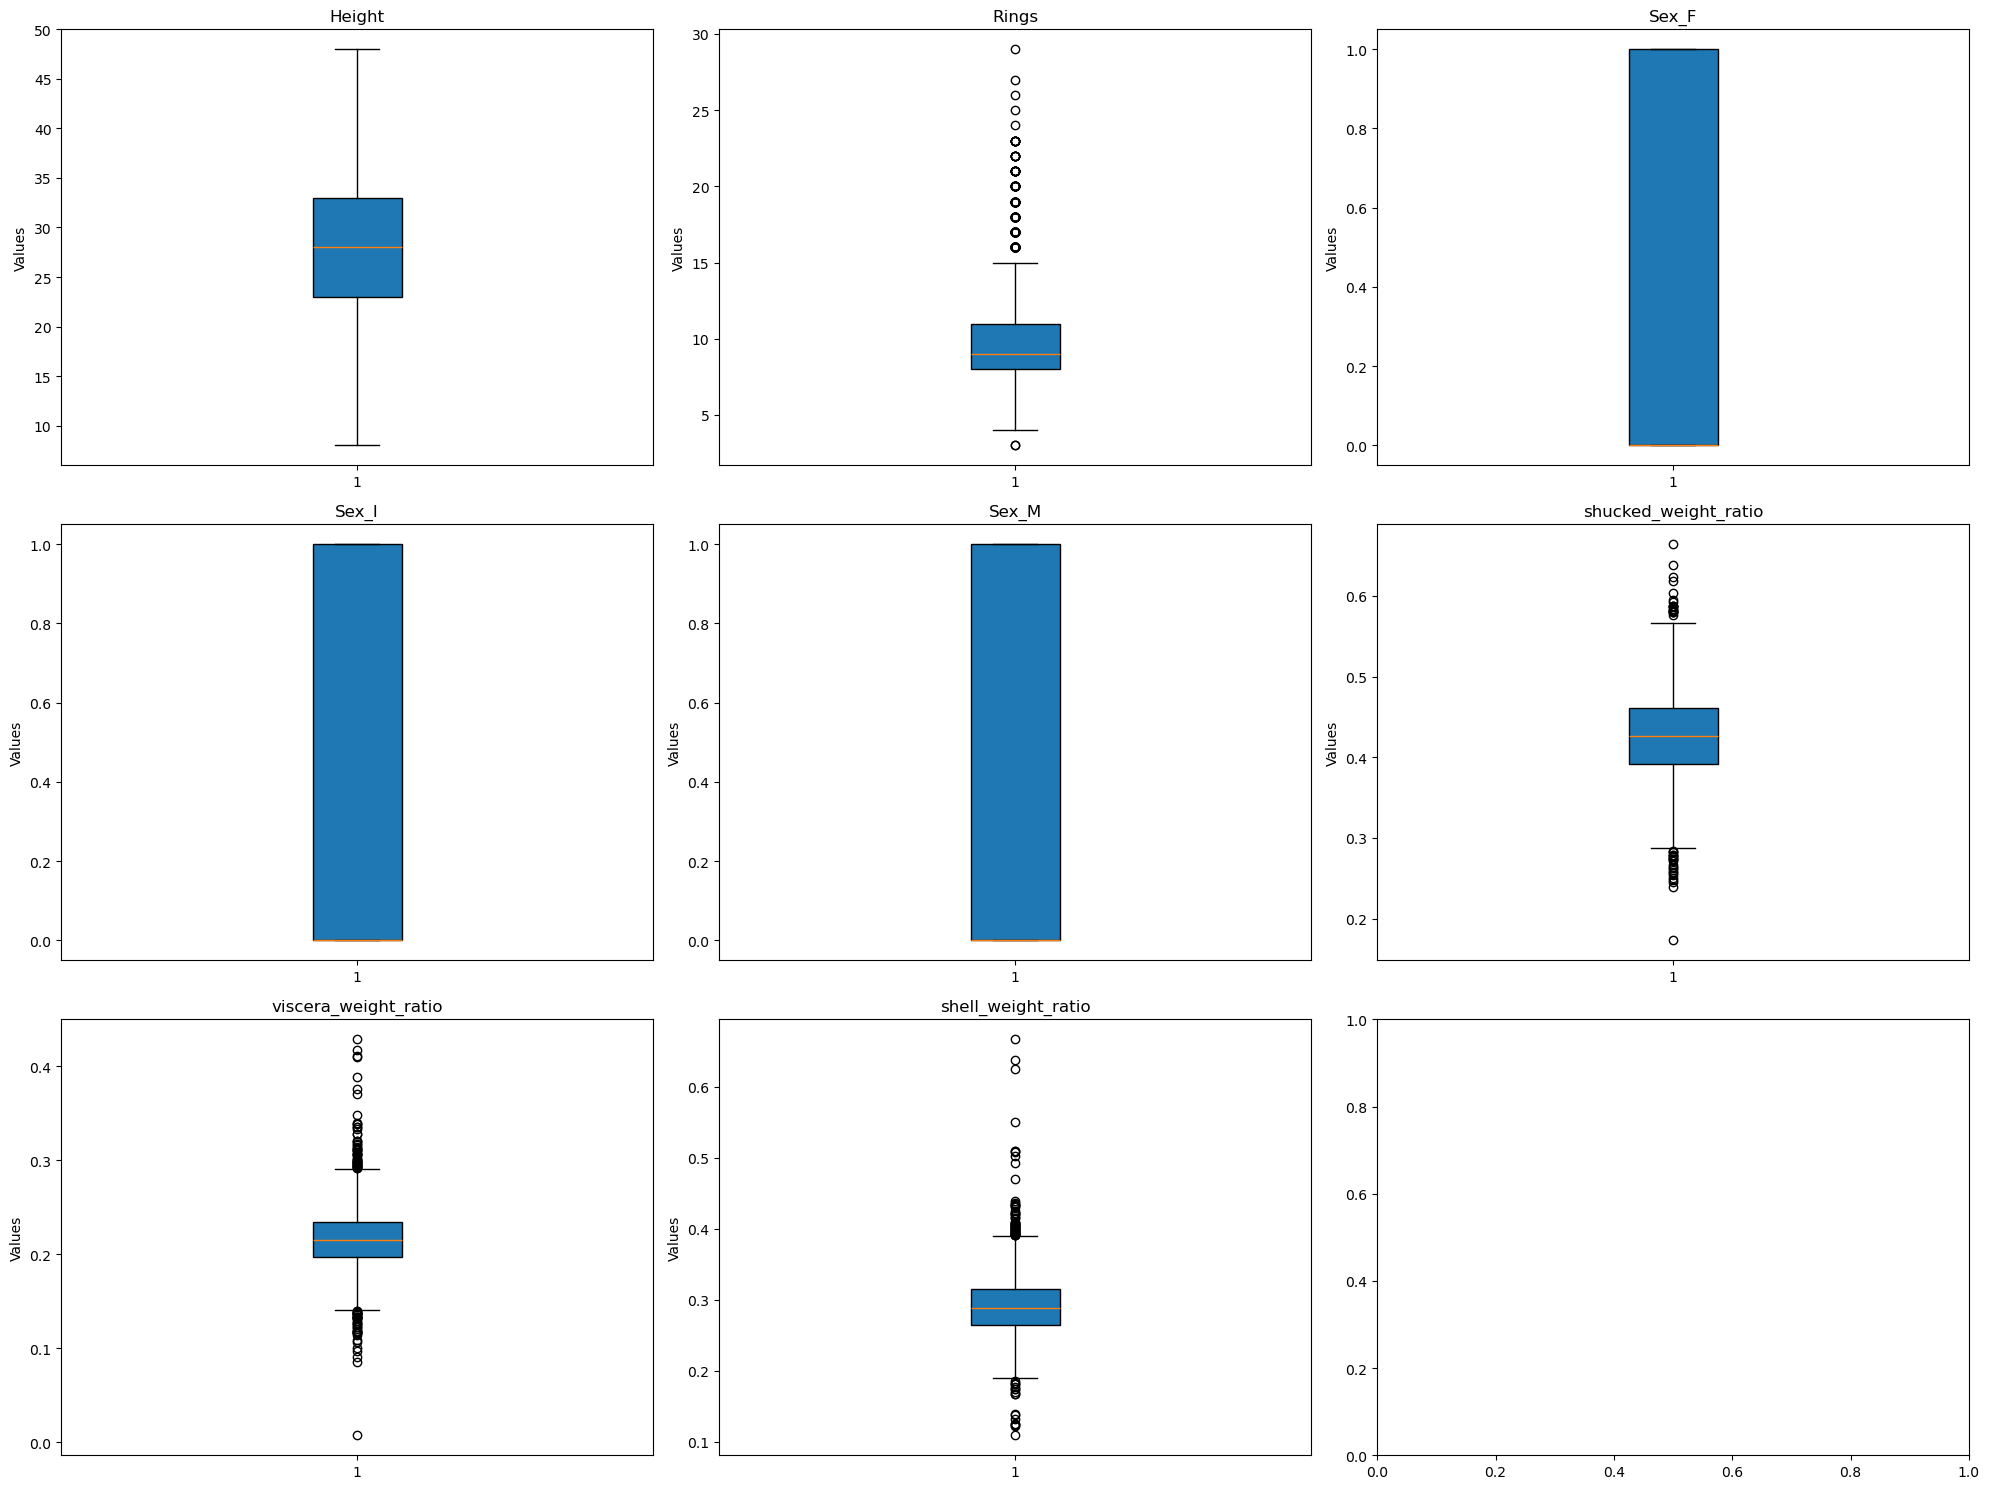

In [29]:
# single feature boxplot(include outliers)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,15))

for i, column in enumerate(data_combined.columns[1:9]):
    ax = axes[i // 3, i % 3]  # column index
    ax.boxplot(data_combined[column], patch_artist=True)
    ax.set_title(column)
    ax.set_ylabel("Values")

plt.tight_layout()

D:\AllSoftwares\Anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\AllSoftwares\Anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\AllSoftwares\Anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\AllSoftwares\Anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

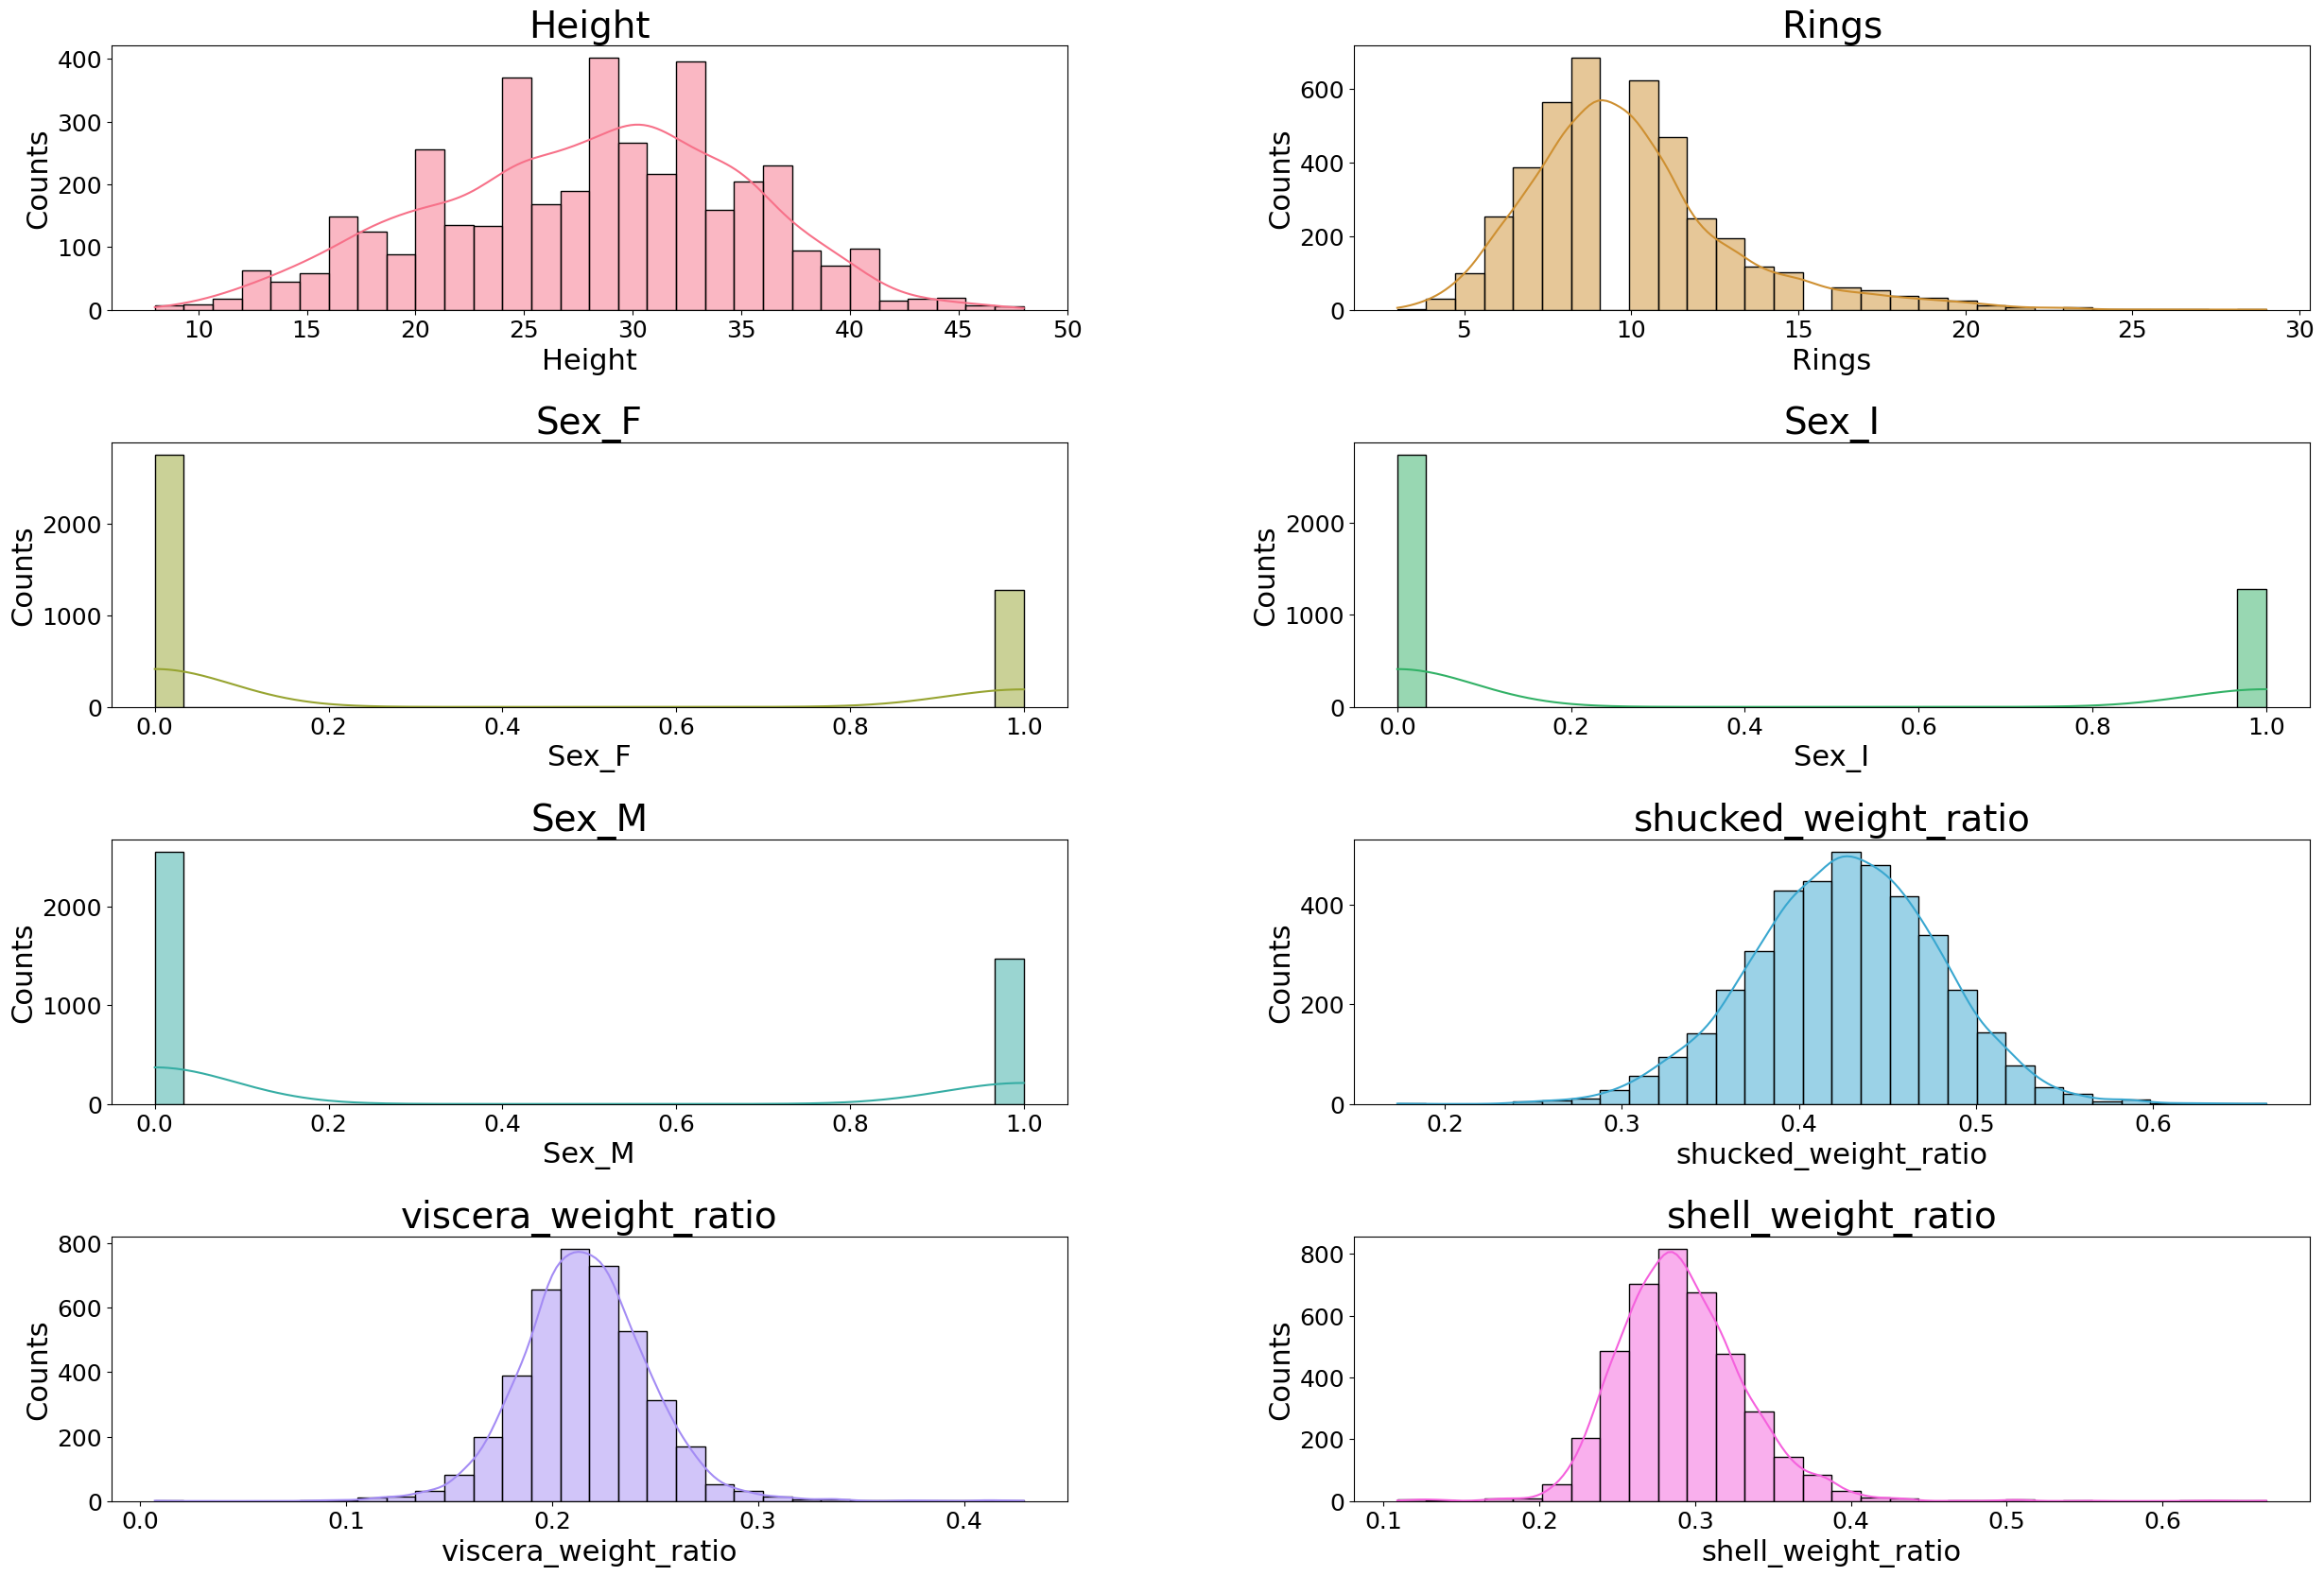

In [30]:
# single feature barplot
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(30,20))

for i, feature in enumerate(data_combined.columns[1:9]):
    ax = axes[i // 2, i % 2]  # column index
    palette = sns.color_palette("husl", len(data_combined.columns[1:9]))  # 生成颜色调色板
    sns.histplot(data_combined[feature], bins=30, kde=True,ax = ax,color=palette[i])
    
    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)
    
    ax.set_title(feature,fontsize = 28)
    ax.set_ylabel('Counts',fontsize = 22)
    ax.set_xlabel(feature, fontsize = 22)
    
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

In [31]:
data_feature = data_combined.drop(columns=['Rings'])
data_target = data_combined['Rings']

In [32]:
# re-split the data sets: traning set - 70%, validation set - 15% ， test set - 15%
fea_train, fea_val, tar_train, tar_val = train_test_split(data_feature, data_target, test_size=0.3, random_state=42)
fea_val, fea_test, tar_val, tar_test = train_test_split(fea_val, tar_val, test_size=0.5, random_state=42)

## ANN model training

### MLPRegression

Training fold 1/5
Training fold 2/5
Training fold 3/5
Training fold 4/5
Training fold 5/5


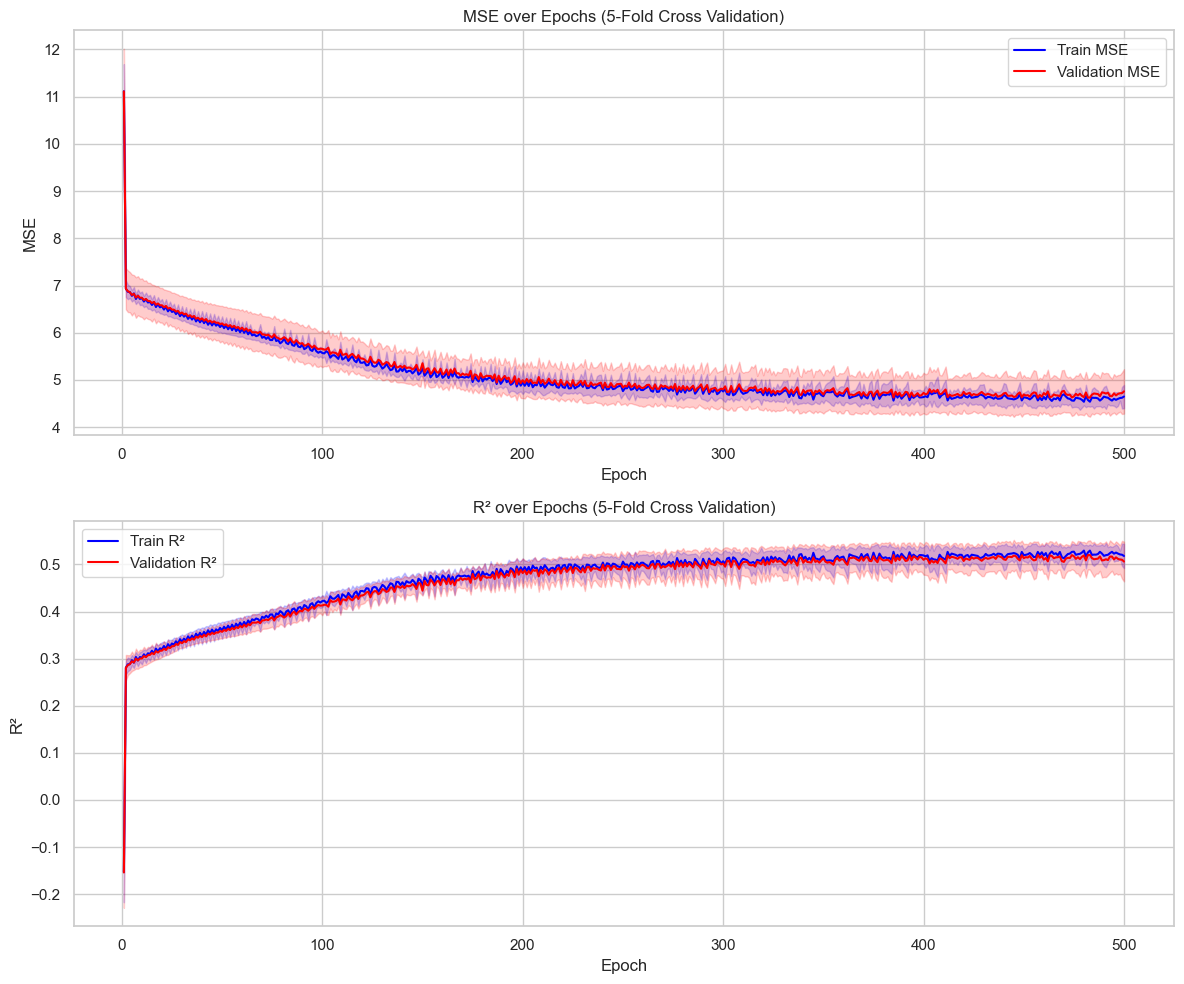


Final Metrics (Last Epoch):

Final Train MSE: 4.648810 ± 0.247537
Final Val MSE:   4.758249 ± 0.470399
Final Train R²:  0.517822 ± 0.025758
Final Val R²:    0.506058 ± 0.042137


In [38]:
from sklearn.neural_network import MLPRegressor
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

n_epochs = 500
learning_rate = 0.0015
batch = 80

# Define MLPRegressor
def train_and_evaluate_fold(X_train, X_val, y_train, y_val, n_epochs):
    # Lists to store MSE and R square in one fold
    fold_train_mse, fold_val_mse = [], []
    fold_train_r2, fold_val_r2 = [], []
    
    #Create MLPRegressor model
    mlp_regressor = MLPRegressor(
        hidden_layer_sizes=(64, 32, 16, 8),
        activation='relu',
        solver='adam',
        learning_rate_init=learning_rate,
        batch_size=batch,
        max_iter=1,
        warm_start=True,
        random_state=1
    )
    
    # Training loop
    for epoch in range(n_epochs):
        mlp_regressor.fit(X_train, y_train)
        
        # Calculate metrics
        train_pred = mlp_regressor.predict(X_train)
        val_pred = mlp_regressor.predict(X_val)
        
        fold_train_mse.append(mean_squared_error(y_train, train_pred))
        fold_val_mse.append(mean_squared_error(y_val, val_pred))
        fold_train_r2.append(r2_score(y_train, train_pred))
        fold_val_r2.append(r2_score(y_val, val_pred))
    
    return fold_train_mse, fold_val_mse, fold_train_r2, fold_val_r2

n_splits = 5

kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
# Results for all folds
all_train_mse = []
all_val_mse = []
all_train_r2 = []
all_val_r2 = []


# Perform k-fold cross validation
for fold_idx, (train_index, val_index) in enumerate(kf.split(fea_train)):
    print(f"Training fold {fold_idx + 1}/{n_splits}")
        
    # Split data for this fold
    X_train, X_val = fea_train.iloc[train_index], fea_train.iloc[val_index]        
    y_train, y_val = tar_train.iloc[train_index], tar_train.iloc[val_index]
    
    # Train and get metrics for this fold
    fold_results = train_and_evaluate_fold(X_train, X_val, y_train, y_val, n_epochs)
    all_train_mse.append(fold_results[0])
    all_val_mse.append(fold_results[1])
    all_train_r2.append(fold_results[2])
    all_val_r2.append(fold_results[3])
    
# Convert to numpy arrays for easier calculation
all_train_mse = np.array(all_train_mse)
all_val_mse = np.array(all_val_mse)
all_train_r2 = np.array(all_train_r2)
all_val_r2 = np.array(all_val_r2)
    
# Calculate mean and std for plotting
train_mse_mean = np.mean(all_train_mse, axis=0)
train_mse_std = np.std(all_train_mse, axis=0)
val_mse_mean = np.mean(all_val_mse, axis=0)
val_mse_std = np.std(all_val_mse, axis=0)
    
train_r2_mean = np.mean(all_train_r2, axis=0)
train_r2_std = np.std(all_train_r2, axis=0)
val_r2_mean = np.mean(all_val_r2, axis=0)
val_r2_std = np.std(all_val_r2, axis=0)


# Create plots
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 1, figsize=(12, 10))
    
epochs = range(1, n_epochs + 1)
    
# Plot MSE curves with confidence intervals
axs[0].plot(epochs, train_mse_mean, label='Train MSE', color='blue')
axs[0].fill_between(epochs, 
                    train_mse_mean - train_mse_std, 
                    train_mse_mean + train_mse_std, 
                    alpha=0.2, color='blue')
axs[0].plot(epochs, val_mse_mean, label='Validation MSE', color='red')
axs[0].fill_between(epochs, 
                    val_mse_mean - val_mse_std, 
                    val_mse_mean + val_mse_std, 
                    alpha=0.2, color='red')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('MSE')
axs[0].legend()
axs[0].set_title(f'MSE over Epochs ({n_splits}-Fold Cross Validation)')
    
# Plot R² curves with confidence intervals
axs[1].plot(epochs, train_r2_mean, label='Train R²', color='blue')
axs[1].fill_between(epochs, 
                    train_r2_mean - train_r2_std, 
                    train_r2_mean + train_r2_std, 
                    alpha=0.2, color='blue')
axs[1].plot(epochs, val_r2_mean, label='Validation R²', color='red')
axs[1].fill_between(epochs, 
                    val_r2_mean - val_r2_std, 
                    val_r2_mean + val_r2_std, 
                    alpha=0.2, color='red')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('R²')
axs[1].legend()
axs[1].set_title(f'R² over Epochs ({n_splits}-Fold Cross Validation)')
    
plt.tight_layout()
plt.show()
    
print("\nFinal Metrics (Last Epoch):\n")
print(f"Final Train MSE: {train_mse_mean[-1]:.6f} ± {train_mse_std[-1]:.6f}")
print(f"Final Val MSE:   {val_mse_mean[-1]:.6f} ± {val_mse_std[-1]:.6f}")
print(f"Final Train R²:  {train_r2_mean[-1]:.6f} ± {train_r2_std[-1]:.6f}")
print(f"Final Val R²:    {val_r2_mean[-1]:.6f} ± {val_r2_std[-1]:.6f}")